# pIC50

Provem si fent el log del IC50 podem fer una millor classificacio de les molecules que tenim
i tambe ens anira millor per veure si tenim bones dades 

The range of pIC50 values for a potent drug varies depending on the specific context and the desired level of inhibition. However, higher pIC50 values indicate more potent drugs in inhibiting the biological process. According to a study on soluble epoxide hydrolase inhibitors, the inhibitory potencies range from 6.7 to 9.4, with a mean pIC50 value of 7.9 ± 1.0
Another study on discovering highly potent molecules found that compounds with a pIC50 value < 6 were considered inactive, while those with an activity > 6 pIC50 were considered potentially potent
Therefore, a pIC50 value of 7 or higher can be considered a good range for a potent drug.

https://pubs.acs.org/doi/pdf/10.1021/acs.jcim.3c00301

https://core.ac.uk/download/pdf/200999669.pdf



In [3]:
from rdkit import Chem
from rdkit import DataStructs
import pandas as pd

df = pd.read_csv('../Data/NRAS_ligands_features.csv')
print(df.columns)


Index(['SMILES', 'Formula', 'Molecular weight', 'LogP', 'H-bond donor',
       'H-bond acceptor', 'TPSA', 'Rotatable bonds', 'IC50'],
      dtype='object')


In [4]:
#primer necessito passar de nM a M el IC50

df['IC50M'] = df['IC50'] / 1e9
print(df.head)

<bound method NDFrame.head of                                                 SMILES       Formula  \
0      COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1cn[nH]c1     C20H21N7O   
1        COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1cccnc1     C22H22N6O   
2        COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1ccncc1     C22H22N6O   
3    Cc1n[nH]c(C)c1-c1cn2c(cnc2cc1CO)-c1cccc(NC2CCN...     C22H25N7O   
4    COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1cnn(CCN...    C26H32N8O2   
..                                                 ...           ...   
768  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...   C51H68N8O7S   
769  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...   C50H69FN8O8   
770  COC(C)c1ncccc1-c1c2CC(C)(C)COC(=O)[C@@H]3CCCN(...  C47H62F3N7O8   
771  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...   C56H77FN8O8   
772  OC[C@H]1O[C@H]([C@H](O)[C@@H](O)[C@@H]1O)N(CCO...   C24H28N2O9S   

     Molecular weight     LogP  H-bond donor  H-bond acceptor    TPSA  \
0          375.180758  2.56880  

In [5]:
#ara fem el pIC50
import numpy as np

df['pIC50'] = -np.log10(df['IC50M'])
print(df.head)

<bound method NDFrame.head of                                                 SMILES       Formula  \
0      COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1cn[nH]c1     C20H21N7O   
1        COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1cccnc1     C22H22N6O   
2        COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1ccncc1     C22H22N6O   
3    Cc1n[nH]c(C)c1-c1cn2c(cnc2cc1CO)-c1cccc(NC2CCN...     C22H25N7O   
4    COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1cnn(CCN...    C26H32N8O2   
..                                                 ...           ...   
768  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...   C51H68N8O7S   
769  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...   C50H69FN8O8   
770  COC(C)c1ncccc1-c1c2CC(C)(C)COC(=O)[C@@H]3CCCN(...  C47H62F3N7O8   
771  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...   C56H77FN8O8   
772  OC[C@H]1O[C@H]([C@H](O)[C@@H](O)[C@@H]1O)N(CCO...   C24H28N2O9S   

     Molecular weight     LogP  H-bond donor  H-bond acceptor    TPSA  \
0          375.180758  2.56880  

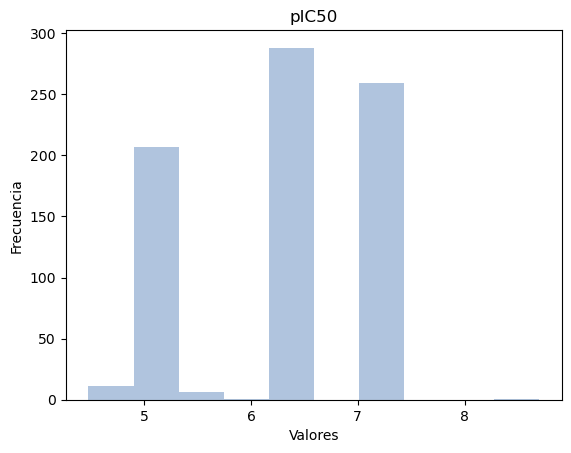

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear el histograma
fig, ax = plt.subplots()
ax.hist(df['pIC50'], color = "lightsteelblue")

# Personalizar el histograma (opcional)
plt.title('pIC50')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()


In [7]:
# Eliminam les columnes IC50 i IC50M

delate_columns = ['IC50', 'IC50M']
for column in delate_columns:
    del df[column]

#guardo per la regressio
df.to_csv('../Data/pIC50_regression.csv', index=False)

summary = df.describe()
print(summary)

       Molecular weight        LogP  H-bond donor  H-bond acceptor  \
count        773.000000  773.000000    773.000000       773.000000   
mean         926.864689    5.847857      2.278137        11.681759   
std          109.997126    0.946998      0.530422         1.355144   
min          299.093773    0.510500      2.000000         5.000000   
25%          906.446217    5.433800      2.000000        11.000000   
50%          937.488416    5.945600      2.000000        12.000000   
75%          975.558210    6.389300      2.000000        13.000000   
max         1154.630408    8.069200      6.000000        15.000000   

             TPSA  Rotatable bonds       pIC50  
count  773.000000       773.000000  773.000000  
mean   168.036779         9.851229    6.300699  
std     19.213009         1.458356    0.806551  
min     54.250000         3.000000    4.479255  
25%    160.460000         9.000000    5.259637  
50%    171.540000        10.000000    6.259637  
75%    177.950000        1

In [8]:
# Definir función para asignar valores enteros
def asignar_valor(valor, limite):
    
    if valor <= limite:
        classif = 0
    else:
        classif =  1
    print(valor, limite, classif)
    return classif

# Definir el valor límite
limite = 7

# Aplicar la función a la columna y reemplazar los valores
df['pIC50'] = df['pIC50'].apply(lambda x: asignar_valor(x, limite))

# Mostrar el DataFrame resultante
print(df)

4.479254528480518 7 0
5.0034883278458215 7 0
5.73754891026957 7 0
4.803547458296611 7 0
4.803547458296611 7 0
5.3535962737769305 7 0
4.82915179635669 7 0
5.029188389127482 7 0
4.779107750780481 7 0
5.429457060118103 7 0
4.526367073126159 7 0
5.3535962737769305 7 0
4.779107750780481 7 0
8.698970004336019 7 1
5.253365801062421 7 0
6.20342566678957 7 0
4.753501419204199 7 0
4.779107750780481 7 0
4.679230771661313 7 0
5.367542707815276 7 0
4.779107750780481 7 0
5.7544873321858505 7 0
5.72584215073632 7 0
5.029188389127482 7 0
7.259637310505756 7 1
5.259637310505756 7 0
7.259637310505756 7 1
6.259637310505756 7 0
7.259637310505756 7 1
6.259637310505756 7 0
6.259637310505756 7 0
5.259637310505756 7 0
7.259637310505756 7 1
7.259637310505756 7 1
7.259637310505756 7 1
5.259637310505756 7 0
6.259637310505756 7 0
5.259637310505756 7 0
6.259637310505756 7 0
6.259637310505756 7 0
6.259637310505756 7 0
6.259637310505756 7 0
6.259637310505756 7 0
6.259637310505756 7 0
6.259637310505756 7 0
6.25963731

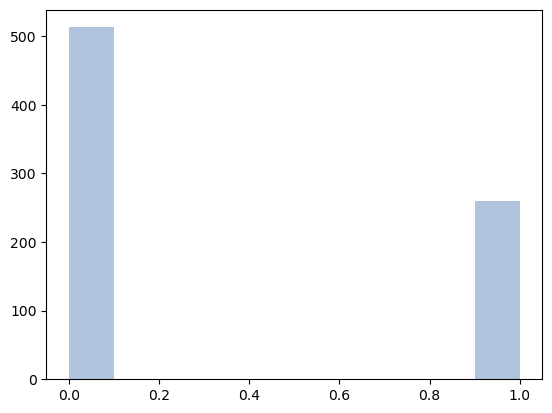

In [9]:
fig, ax = plt.subplots()
ax.hist(df['pIC50'], color = "lightsteelblue")

plt.show()

In [10]:
# Mostrar el DataFrame resultante
print(df.columns)
print(df)

Index(['SMILES', 'Formula', 'Molecular weight', 'LogP', 'H-bond donor',
       'H-bond acceptor', 'TPSA', 'Rotatable bonds', 'pIC50'],
      dtype='object')
                                                SMILES       Formula  \
0      COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1cn[nH]c1     C20H21N7O   
1        COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1cccnc1     C22H22N6O   
2        COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1ccncc1     C22H22N6O   
3    Cc1n[nH]c(C)c1-c1cn2c(cnc2cc1CO)-c1cccc(NC2CCN...     C22H25N7O   
4    COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1cnn(CCN...    C26H32N8O2   
..                                                 ...           ...   
768  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...   C51H68N8O7S   
769  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...   C50H69FN8O8   
770  COC(C)c1ncccc1-c1c2CC(C)(C)COC(=O)[C@@H]3CCCN(...  C47H62F3N7O8   
771  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...   C56H77FN8O8   
772  OC[C@H]1O[C@H]([C@H](O)[C@@H](O)[C@@H]1O)N(CCO

In [24]:
df.to_csv('../Data/pIC50_NRAS.csv', index=False)